In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

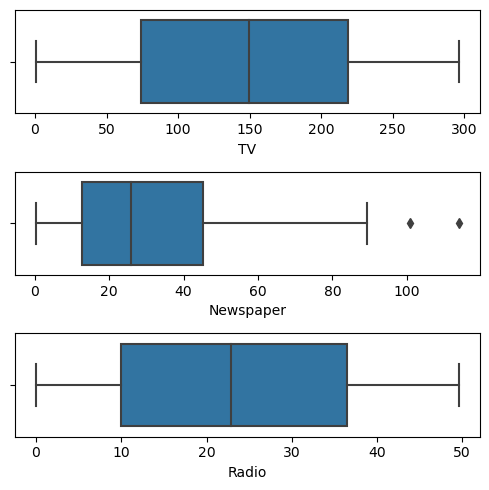

In [11]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'],ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'],ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

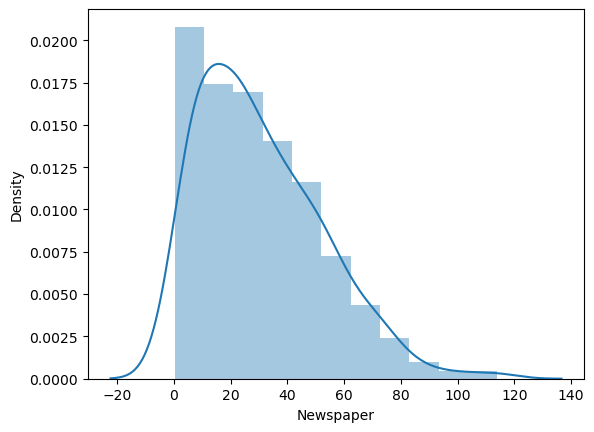

In [12]:
sns.distplot(df['Newspaper'])

In [13]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [15]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.25) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
61.275000000000006


In [17]:
data = df.copy()

In [18]:
data.loc[data['Newspaper']>=93, 'Newspaper'] = 93

<AxesSubplot:xlabel='Newspaper'>

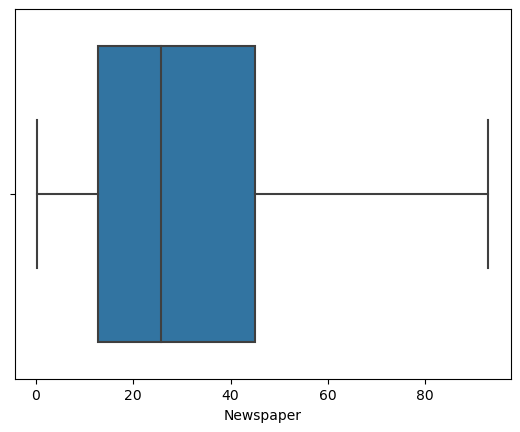

In [19]:
sns.boxplot(data['Newspaper'])

<AxesSubplot:xlabel='Sales'>

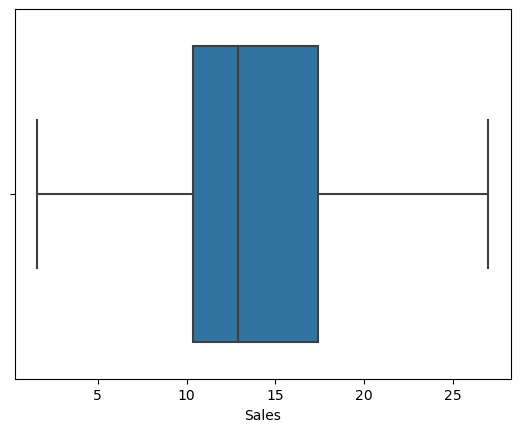

In [21]:
sns.boxplot(data['Sales'])

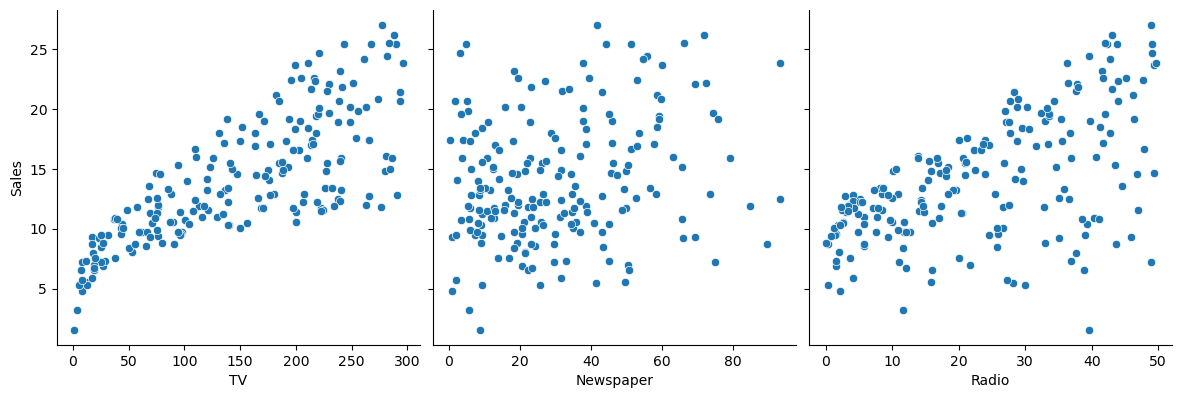

In [26]:
sns.pairplot(data, x_vars = ['TV', 'Newspaper', 'Radio'], y_vars = 'Sales', height = 4, aspect = 1, kind = 'scatter')
plt.show()

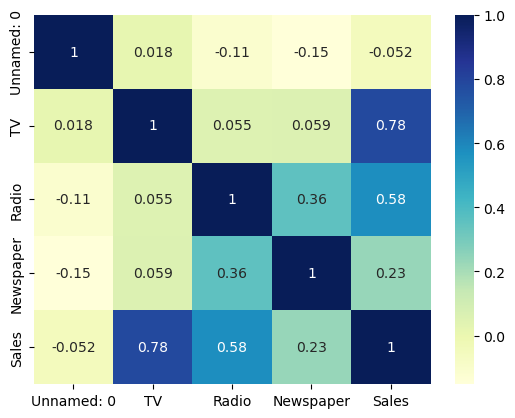

In [27]:
sns.heatmap(data.corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [29]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [31]:
print(important_features)

['TV', 'Radio', 'Sales']


In [32]:
x = data['TV']
y = data['Sales']

In [33]:
x = x.values.reshape(-1,1)

In [34]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [35]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [36]:
print(x.shape, y.shape)

(200, 1) (200,)


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33)

In [39]:
print(x_train.shape, y_train.shape)

(134, 1) (134,)


In [47]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [48]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [49]:
knn_training_pred = knn.predict(x_train)

In [51]:
knn_test_pred = knn.predict(x_test)

In [52]:
print(knn_training_pred, knn_test_pred)

[18.72  7.28 16.22 14.86 13.24 22.26 18.54 19.74 11.3  14.12 13.66 21.16
 12.32  7.52 15.22 18.72 19.74  5.96 15.1  17.54 16.28 15.22  9.98  7.52
 11.34 15.1  13.22 13.56 20.86 20.34 19.04  9.6  18.72 17.54 16.12 15.1
  9.6   5.96 20.86 20.72 19.58 14.12 16.12 13.88 12.66 17.02 11.44 18.54
  9.56 12.22  7.52 11.34  8.02 10.46 19.04 15.3  16.26 16.22 20.34 19.04
  8.8  13.24  5.96 15.62  7.52 19.04 15.18 14.12 16.28  9.8  12.24  5.96
 16.26 19.74 15.62 11.44 11.3  17.58 16.4  19.38  8.02 20.54  5.96 12.24
 14.86 11.44 11.44 17.68 17.18  9.8  12.48 14.06 19.58  8.02 16.02  5.58
 18.72 15.68  9.56 18.14 10.36 19.7   9.68 20.34 16.4  10.36 19.14 18.04
  9.6  17.58 12.48 14.48 12.24 21.16 20.72 18.32 15.6   8.02 12.24 15.9
 16.26 12.24 20.72 15.68 10.06 14.12  7.52 11.06 16.12 16.12 13.66 11.06
  8.08 18.14] [11.3   7.52 12.48 15.1  17.58 13.56 12.12 20.72 11.34 19.74 12.66 20.72
 13.56 11.92 20.72 11.42 17.42 19.86 20.34 14.26  7.52 17.68  5.58 17.12
 19.38  8.02 12.24  9.78 12.48 18.38 16

In [54]:
Results = pd.DataFrame(columns = ["Model", "Train R2", "Test RMSE", "Varience"])

In [57]:
r2 = r2_score(y_test, knn_test_pred)
r2_train = r2_score(y_train, knn_training_pred)
rmse = np.sqrt(mean_squared_error(y_test, knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model" : "K-Nearest Neighbors", "train_R2":r2_train,"Test R2": r2, "Test RMSE":rmse, 
                          "Variance":variance}, ignore_index = True)
print("R2",r2)
print("RMSE",rmse)

R2 0.5506885295708017
RMSE 3.3774744015807627


In [58]:
Results.head()

,Model,Train R2,Test RMSE,Varience,Test R2,Variance,train_R2
0,K-Nearest Neighbors,NaN,3.377474,NaN,0.550689,0.080977,0.631666


In [59]:
svr = SVR().fit(x_train, y_train)

In [60]:
svr

SVR()

In [63]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [64]:
print(svr_train_pred, svr_test_pred)

[18.41745694  8.3268355  17.24967049 12.98687016 12.27877146 18.42381985
 16.50005625 18.49322597 11.71052719 13.38621325 13.2406133  17.7365012
 11.3081338   8.45678992 14.84752135 18.4395822  18.49127459  8.25166701
 14.52734016 15.72463304 15.90859401 14.9108708   9.81360044  8.45419505
 11.58433984 14.47266648 16.88295292 13.77328045 18.47928676 17.57685733
 18.08410326  9.99919192 18.37191463 15.72463304 16.63147822 14.65483258
 10.09668494  8.25306078 18.48184693 18.40022122 17.45695632 13.29570476
 16.57790624 12.6548843  12.5578022  16.36723727 10.59997177 16.50005625
  9.34185856 11.97538734  8.41658454 11.57275031  8.63776744 10.22168723
 17.96329693 14.74490417 17.8150593  17.19051126 17.53197546 18.07755528
  8.86519282 12.39200908  8.24891794 15.24603499  8.41658454 17.94499916
 15.16866613 13.34287602 15.90245593  9.12330235 10.93347187  8.23471978
 16.10492243 17.64102915 15.24603499 10.52800899 11.66109134 17.73227195
 18.10769398 17.39613504  8.65725683 18.48883397  8.

In [66]:
r2 = r2_score(y_test, svr_test_pred)
r2_train = r2_score(y_train, svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test, svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model" : "K-Nearest Neighbors", "train_R2":r2_train,"Test R2": r2, "Test RMSE":rmse, 
                          "Variance":variance}, ignore_index = True)
print("R2",r2)
print("RMSE",rmse)

R2 0.5892546824188257
RMSE 3.2292719768129996


In [67]:
Results.head()

,Model,Train R2,Test RMSE,Varience,Test R2,Variance,train_R2
0,K-Nearest Neighbors,NaN,3.377474,NaN,0.550689,0.080977,0.631666
1,K-Nearest Neighbors,NaN,3.229272,NaN,0.589255,-0.010319,0.578936


In [68]:
import statsmodels.api as sm 

In [72]:
x_train_constant = sm.add_constant(x_train)

In [73]:
model = sm.OLS(y_train, x_train_constant).fit()

In [74]:
model.params


const    7.229583
x1       0.047343
dtype: float64

In [75]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     197.4
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           5.51e-28
Time:                        14:28:14   Log-Likelihood:                -351.63
No. Observations:                 134   AIC:                             707.3
Df Residuals:                     132   BIC:                             713.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2296      0.577     12.536      0.000       6.089       8.370
x1             0.0473      0.003     14.049      0.000       0.041       0.054
==============================================================================
Omnibus:                        0.623   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.732   Jarque-Bera (JB):                0.762
Skew:                          -0.125   Prob(JB):                        0.683
Kurtosis:                       2.728   Cond. No.                         340.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

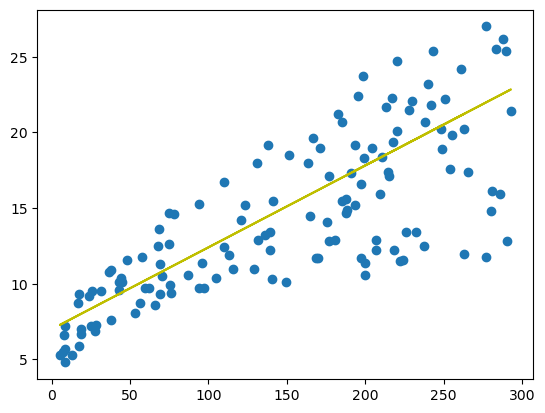

In [76]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9955 + 0.0541 * x_train, 'y')
plt.show()

In [78]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [79]:
y_pred

array([11.83136928,  8.14804666, 12.47050624, 15.06966321, 17.63567973,
       14.3169019 , 12.09175841, 18.59675235, 11.47629319, 17.56939887,
       12.95814407, 18.5825493 , 14.20327755, 11.28691928, 18.55887756,
       10.7045945 , 20.18749322, 20.552038  , 21.26219018, 13.18065842,
        8.07703144, 17.47471191,  7.42369144, 19.86555757, 17.33268147,
        8.41790449, 10.7945471 ,  9.5967571 , 12.31427276, 18.33162887,
       18.09491148, 17.75877278, 10.39686189,  7.8545171 ,  7.78350188,
       18.46892495,  8.4983884 , 13.63042146, 11.02653015, 18.59675235,
       14.9607732 , 11.98286841, 15.51942625,  8.15751536, 16.93499625,
       21.12962844, 12.77823885, 19.78507365, 10.84662493, 11.41001232,
        9.09965058, 16.81663756,  7.26272362, 13.83399842, 11.76035406,
       11.50943363, 13.99496625, 18.0380993 , 13.58781233, 10.84189058,
       14.6435719 , 17.20958843, 17.98602148, 20.68933409, 12.92026929,
       15.39633321])

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [82]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.054396971038122

In [83]:
r2 = r2_score(y_test, y_pred)

In [84]:
r2

0.6325363925147711

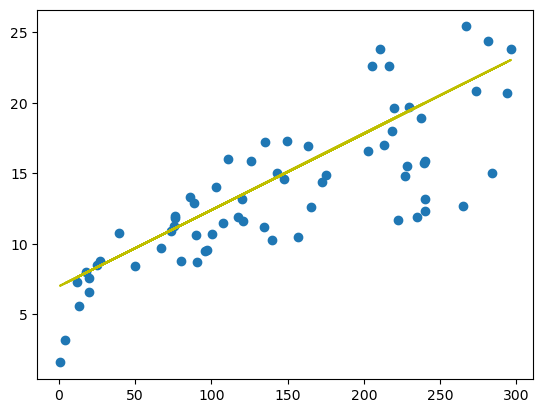

In [85]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.9955 + 0.0541 * x_test, 'y')
plt.show()